In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

In [2]:
first_base = pd.read_csv('atbats_first_solo.csv')

first_base

,Unnamed: 0,Batter_name,Rbi_outcome,Success_past,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players
0,0,Aaron Hill,0,0.05,1,0,0,1,False,True,1,"{'init': 0, 467827: 1}"
1,1,Aaron Hill,0,0.05,1,3,8,7,False,True,1,"{'init': 0, 467827: 1}"
2,2,Aaron Hill,0,0.05,2,6,8,8,False,True,1,"{'init': 0, 542999: 1}"
3,3,Aaron Hill,1,0.00,1,1,3,3,False,False,1,"{'init': 0, 467827: 1}"
4,4,Josh Donaldson,1,0.10,0,9,10,11,True,False,0,"{'init': 0, 476704: 1}"
...,...,...,...,...,...,...,...,...,...,...,...,...
355613,355613,Ramón Laureano,0,0.00,2,7,8,9,False,True,1,"{'init': 0, 642201: 1}"
355614,355614,Francisco Lindor,1,0.15,1,7,8,9,True,False,1,"{'init': 0, 516782: 1}"
355615,355615,Matt Olson,0,0.10,3,0,0,1,False,True,1,"{'init': 0, 542303: 1}"
355616,355616,Sean Murphy,0,0.15,1,1,0,2,False,False,1,"{'init': 0, 570482: 1}"


In [26]:
first_base.drop(columns=['Unnamed: 0', 'Batter_name'], inplace=True)

In [27]:
first_base['isTopInning'] =first_base['isTopInning'].apply(lambda x: 1 if x==True else 0)
first_base['Isout'] = first_base['Isout'].apply(lambda x: 1 if x==True else 0)

In [28]:
first_base.head()

,Rbi_outcome,Success_past,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs
0,0,0.05,1,0,0,1,0,1,1
1,0,0.05,1,3,8,7,0,1,1
2,0,0.05,2,6,8,8,0,1,1
3,1,0.00,1,1,3,3,0,0,1
4,1,0.10,0,9,10,11,1,0,0


In [29]:
first_base['Diff'] = first_base.apply(lambda x: x['awayScore'] - x['homeScore'] if x['isTopInning'] == 1 else x['homeScore'] - x['awayScore'], axis=1)



In [30]:
first_base.head()

,Rbi_outcome,Success_past,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,Diff
0,0,0.05,1,0,0,1,0,1,1,0.0
1,0,0.05,1,3,8,7,0,1,1,-5.0
2,0,0.05,2,6,8,8,0,1,1,-2.0
3,1,0.00,1,1,3,3,0,0,1,-2.0
4,1,0.10,0,9,10,11,1,0,0,1.0


In [31]:
first_base['time_differential'] = first_base['inning'].apply(lambda x: 9 - x)

In [32]:
first_base.head()

,Rbi_outcome,Success_past,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,Diff,time_differential
0,0,0.05,1,0,0,1,0,1,1,0.0,8
1,0,0.05,1,3,8,7,0,1,1,-5.0,2
2,0,0.05,2,6,8,8,0,1,1,-2.0,1
3,1,0.00,1,1,3,3,0,0,1,-2.0,6
4,1,0.10,0,9,10,11,1,0,0,1.0,-2


In [33]:
first_base = first_base.loc[first_base['Current_outs'] <2]

In [34]:
# librariers
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import hvplot.pandas
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib
from imblearn.over_sampling import RandomOverSampler
from scipy import optimize

In [35]:
first_base['Rbi_occurence'] = first_base['Rbi_outcome'].apply(lambda x: 1 if x > 0 else 0)

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4132/111577235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_base['Rbi_occurence'] = first_base['Rbi_outcome'].apply(lambda x: 1 if x > 0 else 0)


In [73]:
X = first_base.drop(columns=['Rbi_occurence', 'Rbi_outcome', 'Outs', 'homeScore', 'awayScore', 'inning', 'isTopInning' ,'Isout'])

X.head()

,index,Success_past,Current_outs,Diff,time_differential,Scale,Diff_transform
0,271273,0.0,1,24.0,3,-1.450385,2.572209e-56
1,96085,0.0,1,12.0,8,-1.265323,1.266417e-14
2,153697,0.0,1,20.0,1,-1.249545,2.489121e-39
3,196348,0.0,1,20.0,1,-1.249545,2.489121e-39
4,162668,0.0,1,15.0,5,-1.245175,1.928750e-22


In [74]:
X = pd.get_dummies(X, columns=['Current_outs'])

In [75]:
X

,index,Success_past,Diff,time_differential,Scale,Diff_transform,Current_outs_0,Current_outs_1
0,271273,0.00,24.0,3,-1.450385,2.572209e-56,0,1
1,96085,0.00,12.0,8,-1.265323,1.266417e-14,0,1
2,153697,0.00,20.0,1,-1.249545,2.489121e-39,0,1
3,196348,0.00,20.0,1,-1.249545,2.489121e-39,0,1
4,162668,0.00,15.0,5,-1.245175,1.928750e-22,0,1
...,...,...,...,...,...,...,...,...
314320,81260,0.40,-5.0,1,4.494807,3.865920e-03,0,1
314321,65046,0.45,0.0,8,4.693414,1.000000e+00,0,1
314322,65075,0.45,2.0,1,4.896600,4.111123e-01,0,1
314323,64787,0.45,-2.0,4,4.907687,4.111123e-01,0,1


In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Specify the columns to standardize
columns_to_scale = ['Success_past', 'Diff', 'time_differential']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the specified columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X


,index,Success_past,Diff,time_differential,Scale,Diff_transform,Current_outs_0,Current_outs_1
0,271273,-1.093268,7.496476,-0.395503,-1.450385,2.572209e-56,0,1
1,96085,-1.093268,3.748315,1.502035,-1.265323,1.266417e-14,0,1
2,153697,-1.093268,6.247089,-1.154518,-1.249545,2.489121e-39,0,1
3,196348,-1.093268,6.247089,-1.154518,-1.249545,2.489121e-39,0,1
4,162668,-1.093268,4.685355,0.363512,-1.245175,1.928750e-22,0,1
...,...,...,...,...,...,...,...,...
314320,81260,5.997425,-1.561580,-1.154518,4.494807,3.865920e-03,0,1
314321,65046,6.883762,0.000154,1.502035,4.693414,1.000000e+00,0,1
314322,65075,6.883762,0.624848,-1.154518,4.896600,4.111123e-01,0,1
314323,64787,6.883762,-0.624540,-0.015995,4.907687,4.111123e-01,0,1


In [85]:
w1 = 0.6
w2 = 0.2
w3 = 0.1
w4 = 0.05
w5 = 0.05
w6 = 0.025

X['Scale'] = X['Success_past'] * w1 + X['Diff_transform'] * -w2 + X['time_differential'] * -w3 + X['Current_outs_0'] * w4 + X['Current_outs_1'] * w5

first_base['Scale'] = X['Success_past'] * w1 + X['Diff_transform'] * -w2 + X['time_differential'] * -w3 + X['Current_outs_0'] * w4 + X['Current_outs_1'] * w5 



In [89]:
first_base = first_base.sort_values(by='Scale')

In [94]:
first_base.drop(columns=['level_0'],inplace=True)
first_base = first_base.reset_index()

In [61]:
first_base['Diff_transform'] = first_base['Diff'].apply(lambda x: np.exp(-(x**2) / (2 * (1.5)**2)))

array([[<AxesSubplot:title={'center':'Diff_transform'}>]], dtype=object)

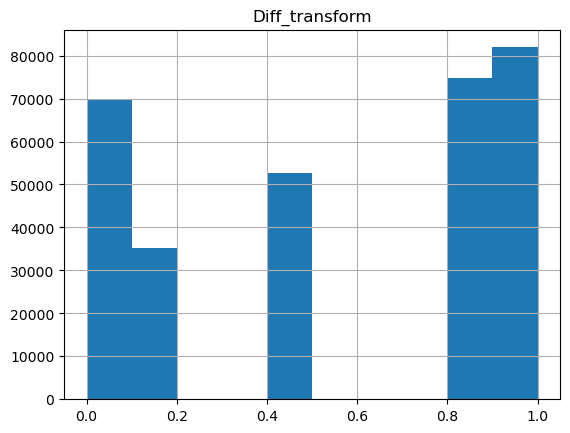

In [62]:
first_base.hist('Diff_transform')

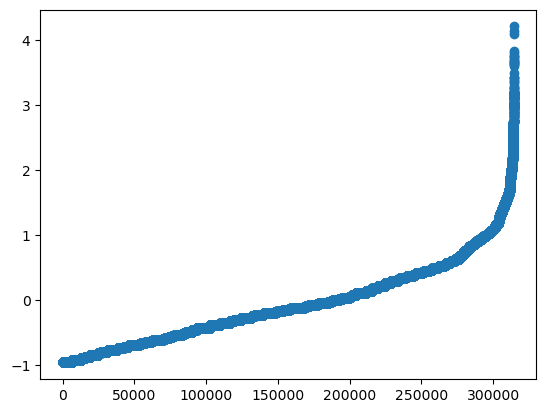

In [95]:
plt.scatter(x=first_base.index, y=first_base['Scale'])

In [98]:
len(first_base.loc[first_base['Scale'] > 1])

19240

In [99]:
first_base.loc[first_base['Scale'] > 1]['Rbi_occurence'].sum()

3562

In [54]:
first_base.loc[first_base['Scale'] < 1]['Rbi_occurence'].sum()

49115

In [55]:
first_base.loc[first_base['Success_past'] > 0.2]['Rbi_occurence'].sum()

622

In [67]:
first_base.loc[first_base['Success_past'] > 0.2]

,level_0,index,Rbi_outcome,Success_past,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,Diff,time_differential,Rbi_occurence,Scale
164,350001,244434,0,0.25,2,2,0,2,0,0,2,2.0,7,0,-1.093091
166,350000,104190,0,0.25,2,0,2,2,1,0,2,2.0,7,0,-1.093091
258,350003,266809,0,0.25,3,2,0,2,0,1,1,2.0,7,0,-1.072367
281,351425,130916,0,0.25,0,0,0,1,1,0,0,0.0,8,0,-1.068941
315,351156,252307,0,0.25,2,3,0,4,0,1,1,3.0,5,0,-1.065459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354191,354208,145043,0,0.25,0,3,3,7,0,0,0,0.0,2,0,2.462761
355036,349552,86635,0,0.25,1,3,8,4,1,0,1,5.0,5,0,2.899906
355070,349558,322343,0,0.25,3,5,0,4,0,1,1,5.0,5,0,2.913722
355266,350390,83595,0,0.25,3,0,0,1,1,1,1,0.0,8,0,3.044860


In [ ]:
first_base.plot()

In [14]:
y = first_base['Rbi_occurence'].ravel()
y[:5]

array([0, 0, 0, 0, 1])

In [ ]:
# estimates match logit function

log_reg = sm.Logit(data_df_test['Default'], data_df_test[data_df_test.columns.drop('Default')]).fit()

log_reg.summary()